In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Week-3

**Note to Learners**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment.

**Do not edit this cell.**

In [3]:
np.random.seed(0)

N = 2000
data1 = np.random.randn(N//3,2) + np.array([2,2])
data2 = np.random.randn(N//3,2) + np.array([-3,-3])
data3 = np.random.randn(N//3,2) + np.array([-5,3])
X = np.concatenate((data1, data2, data3))


## Problem 1
How many samples are there in the dataset?



## Solution

In [4]:
# Enter your solution here
n_samples = X.shape[0]
print(f"Number of samples: {n_samples}")

Number of samples: 1998


## Problem 2

How many features are there in the dataset?


## Solution

In [5]:
# Enter your solution here
n_features = X.shape[1]
print(f"Number of features: {n_features}")

Number of features: 2


## Problem 3
Plot the dataset using matplotlib.



## Solution

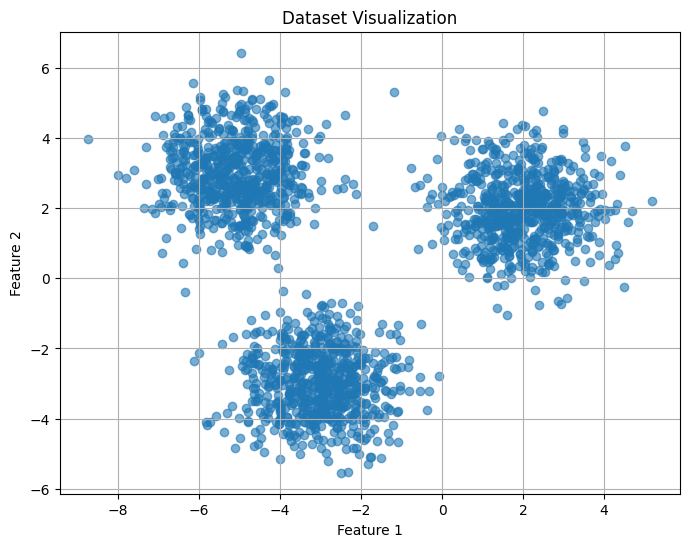

In [6]:
# Enter your solution here
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset Visualization')
plt.grid(True)
plt.show()

## Instruction

Assume k = 3. Take the data points with indices 200, 800 and 1200 in X to be the initial cluster centers.


In [7]:
# Enter your code here
k = 3
initial_indices = [200, 800, 1200]
cluster_centers = X[initial_indices].copy()
print("Initial cluster centers:")
print(cluster_centers)

Initial cluster centers:
[[ 1.40134606  0.88410301]
 [-2.56922887 -3.14989159]
 [-2.84782302 -3.37412632]]


## Problem 4

Write a function `assign_clusters(X, k, cluster_centers)` that assigns a cluster to each data point as per their distance from each cluster centre and returns a vector `z`, where $z[i] \in \{0, 1, 2\}$.

What is the mean of the values in vector `z`? Provide the answer correct up to three decimal places.



## Solution

In [8]:
# Enter your solution here
def assign_clusters(X, k, cluster_centers):
    n_samples = X.shape[0]
    z = np.zeros(n_samples, dtype=int)
    
    for i in range(n_samples):
        distances = []
        for j in range(k):
            # Calculate Euclidean distance
            distance = np.sqrt(np.sum((X[i] - cluster_centers[j])**2))
            distances.append(distance)
        
        # Assign to closest cluster
        z[i] = np.argmin(distances)
    
    return z

# Apply the function
z = assign_clusters(X, k, cluster_centers)
mean_z = np.mean(z)
print(f"Mean of vector z: {mean_z:.3f}")

Mean of vector z: 0.711


## Problem 5

Plot the data points, with different color for different clusters.


## Solution

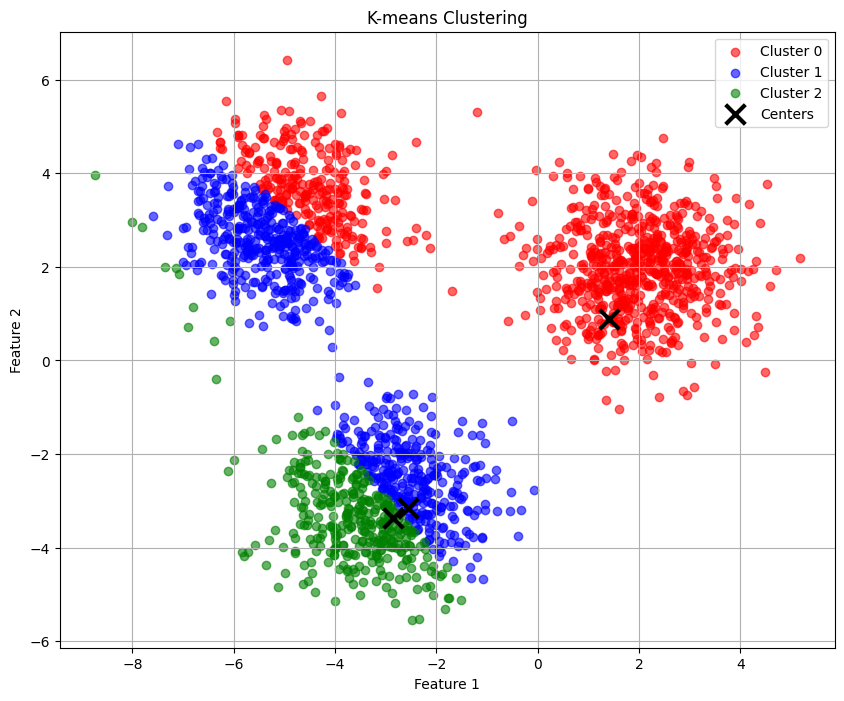

In [9]:
# Enter your solution here
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green']
for i in range(k):
    cluster_data = X[z == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], 
                c=colors[i], label=f'Cluster {i}', alpha=0.6)

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
            c='black', marker='x', s=200, linewidths=3, label='Centers')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.legend()
plt.grid(True)
plt.show()

## Problem 6
Write a function `compute_cluster_centers(X, z, k)` that computes the clusters' centers as per z and returns `k` new cluster centers.

What is the mean of the three cluster centers? Provide the $x_1$ and $y_1$ component. Provide both components correct up to three decimal places.



## Solution

In [10]:
# Enter your solution here
def compute_cluster_centers(X, z, k):
    new_centers = np.zeros((k, X.shape[1]))
    
    for i in range(k):
        cluster_points = X[z == i]
        if len(cluster_points) > 0:
            new_centers[i] = np.mean(cluster_points, axis=0)
    
    return new_centers

# Compute new cluster centers
new_cluster_centers = compute_cluster_centers(X, z, k)
mean_centers = np.mean(new_cluster_centers, axis=0)

print("New cluster centers:")
print(new_cluster_centers)
print(f"Mean of cluster centers - x1 component: {mean_centers[0]:.3f}")
print(f"Mean of cluster centers - y1 component: {mean_centers[1]:.3f}")

New cluster centers:
[[ 0.15243752  2.47002787]
 [-4.09339723  0.26891354]
 [-3.71658966 -3.31569723]]
Mean of cluster centers - x1 component: -2.553
Mean of cluster centers - y1 component: -0.192


## Extra

Keep executing the code in problems 4, 5 and 6 (for, say, 10 iterations) to observe how the clusters change across different iterations.

## Solution

Converged at iteration 5


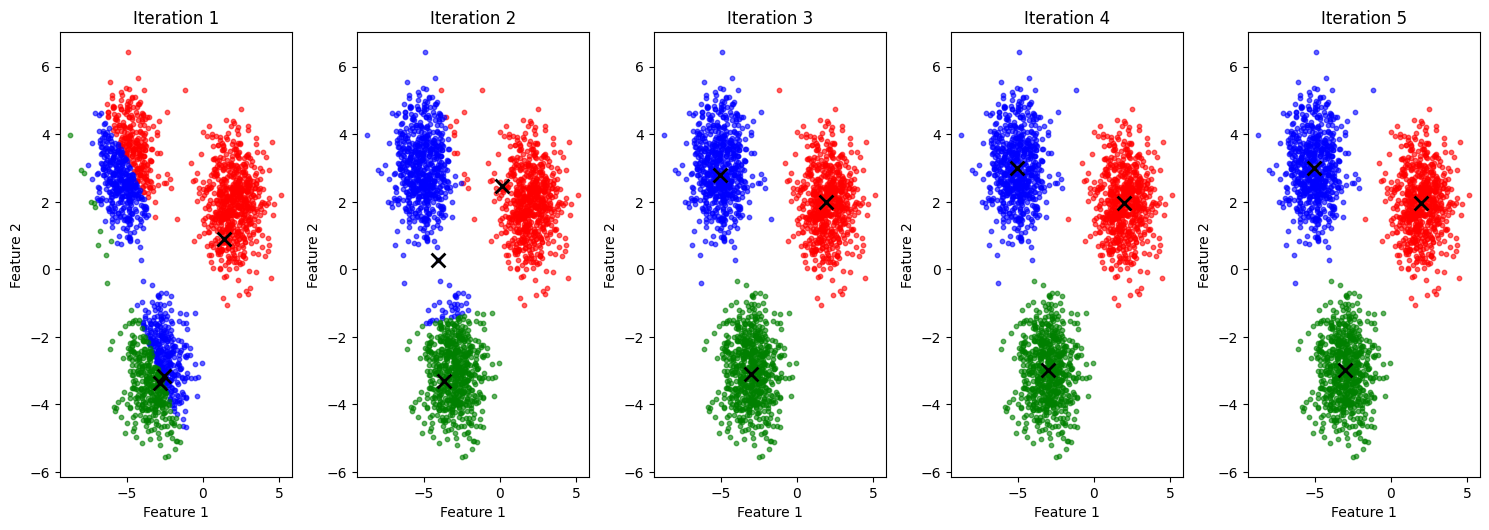

Final cluster centers:
[[ 1.9829719   1.95951297]
 [-5.08711902  3.00839407]
 [-3.04475663 -2.98468709]]


In [11]:
# Enter your code here
# Initialize
current_centers = cluster_centers.copy()
max_iterations = 10

plt.figure(figsize=(15, 10))

for iteration in range(max_iterations):
    # Assign clusters
    z = assign_clusters(X, k, current_centers)
    
    # Plot current state
    plt.subplot(2, 5, iteration + 1)
    colors = ['red', 'blue', 'green']
    
    for i in range(k):
        cluster_data = X[z == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], 
                    c=colors[i], alpha=0.6, s=10)
    
    plt.scatter(current_centers[:, 0], current_centers[:, 1], 
                c='black', marker='x', s=100, linewidths=2)
    
    plt.title(f'Iteration {iteration + 1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    # Compute new centers
    new_centers = compute_cluster_centers(X, z, k)
    
    # Check for convergence
    if np.allclose(current_centers, new_centers):
        print(f"Converged at iteration {iteration + 1}")
        break
    
    current_centers = new_centers.copy()

plt.tight_layout()
plt.show()

print("Final cluster centers:")
print(current_centers)